### 1. Импорт библиотек и подготовка датафрейма:

In [1]:
import pandas as pd
from faker import Faker
import numpy as np
import random
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from prophet import Prophet
from pandas.tseries.offsets import MonthEnd

In [2]:
fake = Faker()

# Создание списка товаров
products = ['TV', 'Monitor', 'Smartphone', 'Tablet', 'Laptop']

# Генерация случайных данных для остальных столбцов
num_rows = np.random.randint(100000, 500000)
sale_dates = []
while len(sale_dates) < num_rows:
    sale_date = fake.date_time_between(start_date='-4y',
                                       end_date='now',
                                       tzinfo=None)
    if 8 <= sale_date.hour < 20:
        sale_dates.append(sale_date)
sale_places = random.choices(['point_1', 'point_2',
                              'point_3', 'point_4',
                              'online'], k=len(sale_dates))

# Создание словаря с постоянными списками продавцов
sellers_by_place = {
    'point_1': [fake.name().replace(' ', '_')
                for _ in range(np.random.randint(3, 10))],
    'point_2': [fake.name().replace(' ', '_')
                for _ in range(np.random.randint(3, 10))],
    'point_3': [fake.name().replace(' ', '_')
                for _ in range(np.random.randint(3, 10))],
    'point_4': [fake.name().replace(' ', '_')
                for _ in range(np.random.randint(3, 10))],
    'online': ['online']
}

# Генерация списка продавцов на основе места продажи
salespersons = [random.choice(sellers_by_place[place])
                if place != 'online'
                else 'online'
                for place in sale_places]

data = {
    'salesperson': salespersons,
    'product': [random.choice(products)
                for _ in range(len(sale_dates))],
    'price': np.random.randint(100, 1000, size=len(sale_dates)),
    'sale_place': sale_places,
    'customer': [fake.name().replace(' ', '_')
                 for _ in range(len(sale_dates))],
    'sale_date': sale_dates
}

# Создание DataFrame
df = pd.DataFrame(data)

# Сортировка по дате
df = df.sort_values(by='sale_date')

# Просмотр DataFrame
df

,salesperson,product,price,sale_place,customer,sale_date
46865,Christopher_Cook,Monitor,180,point_4,Kenneth_Morrison,2020-02-22 08:07:32
242547,online,Laptop,519,online,Jill_Adkins,2020-02-22 08:10:29
83680,online,Laptop,401,online,Aaron_Walker,2020-02-22 08:11:18
85281,Matthew_Jackson,Monitor,276,point_1,Christopher_Wood,2020-02-22 08:24:06
22994,online,Laptop,422,online,Allison_Chang,2020-02-22 08:28:48
...,...,...,...,...,...,...
157731,Timothy_Watts_DDS,Tablet,293,point_3,Brian_Bond,2024-02-21 18:40:02
26508,Andrea_Little,TV,823,point_1,Scott_Miller,2024-02-21 18:42:52
17615,Timothy_Watts_DDS,Monitor,212,point_3,Nicole_Davis,2024-02-21 18:46:26
86340,online,Tablet,152,online,Angela_Owen,2024-02-21 18:56:35


### 2. Задания к датафрейму:

1) Определите, какой товар был продан больше всего за весь период, и какой - меньше всего.
2) Выясните, какой продавец совершил больше всего продаж, а какой - меньше всего.
3) Постройте график динамики продаж всех товаров по месяцам.
4) Постройте график динамики продаж отдельного товара по месяцам.
5) Постройте график динамики средней цены суммы всех товаров по месяцам.
6) Постройте график динамики средней цены каждого товара по месяцам.
7) Постройте график динамики продаж каждого отдела по месяцам.
8) Постройте график динамики продаж каждого продавца по месяцам.
9) Постройте график прогнозирования продаж каждого отдела на три месяца.
10) Постройте график прогнозирования продаж каждого продавца на три месяца.

#### 1. Определите, какой товар был продан больше всего за весь период, и какой - меньше всего.

In [3]:
# Подсчет количества продаж каждого товара
product_sales = df['product'].value_counts()

# Нахождение товара, который был продан больше всего и меньше всего
most_sold_product = product_sales.idxmax()
least_sold_product = product_sales.idxmin()

print(f'Товар, проданный больше всего: {most_sold_product}')
print(f'Товар, проданный меньше всего: {least_sold_product}')

Товар, проданный больше всего: Laptop
Товар, проданный меньше всего: Tablet


#### 2. Выясните, какой продавец совершил больше всего продаж, а какой - меньше всего.

In [4]:
# Подсчет количества продаж каждого продавца
salesperson_sales = df['salesperson'].value_counts()

# Отфильтруем DataFrame, чтобы исключить продавцов 'online'
salesperson_sales_filtered = df[df['salesperson'] != 'online']

# Подсчет количества продаж каждого продавца
salesperson_sales_filtered = salesperson_sales_filtered['salesperson'].value_counts()

# Нахождение продавца, который совершил больше всего продаж и меньше всего
most_sales_salesperson = salesperson_sales.idxmax()
most_sales_salesperson_filtered = salesperson_sales_filtered.idxmax()
least_sales_salesperson = salesperson_sales.idxmin()

print(f'Продавец, совершивший больше всего продаж: {most_sales_salesperson}')
print(f'Продавец, совершивший больше всего продаж (кроме online): {most_sales_salesperson_filtered}\n')
print(f'Продавец, совершивший меньше всего продаж: {least_sales_salesperson}')

Продавец, совершивший больше всего продаж: online
Продавец, совершивший больше всего продаж (кроме online): Trevor_Alvarez

Продавец, совершивший меньше всего продаж: Thomas_Hodges


#### 3. Постройте график динамики продаж всех товаров по месяцам.

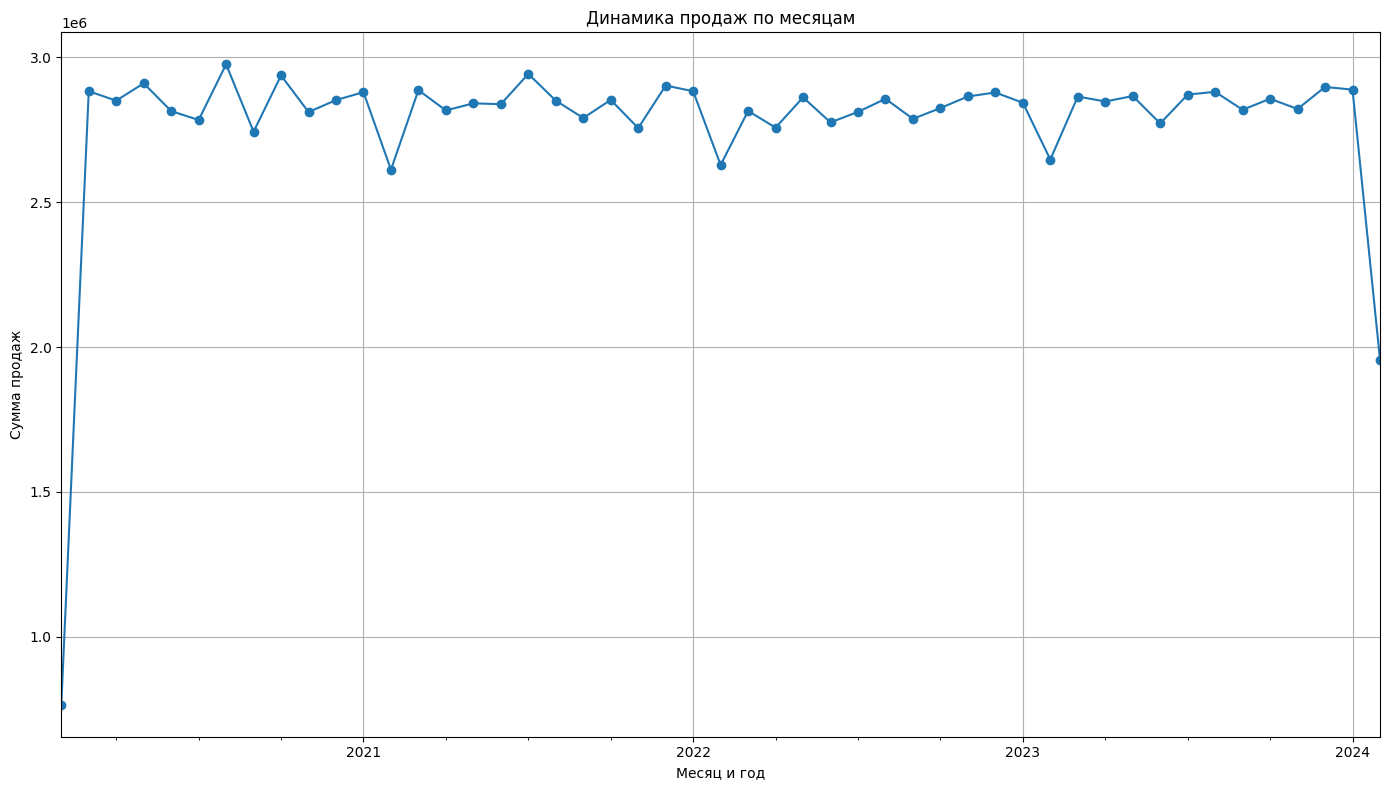

In [5]:
# Создаем копию DataFrame для безопасной работы
df_copy = df.copy()

# Преобразовываем столбец 'sale_date' в формат даты
df_copy['sale_date'] = pd.to_datetime(df_copy['sale_date'])

# Создаем новый столбец 'sale_month', содержащий месяц продажи
df_copy['sale_month'] = df_copy['sale_date'].dt.to_period('M')

# Группируем данные по месяцам и суммируем продажи
monthly_sales = df_copy.groupby('sale_month')['price'].sum()

# Строим график
plt.figure(figsize=(14, 8))
monthly_sales.plot(marker='o')
plt.title('Динамика продаж по месяцам')
plt.xlabel('Месяц и год')
plt.ylabel('Сумма продаж')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 4. Постройте график динамики продаж отдельного товара по месяцам.

In [6]:
# Создаем копию DataFrame для безопасной работы
df_copy = df.copy()

# Преобразовываем столбец 'sale_date' в формат даты
df_copy['sale_date'] = pd.to_datetime(df_copy['sale_date'])

# Создаем новый столбец 'sale_month', содержащий месяц продажи
df_copy['sale_month'] = df_copy['sale_date'].dt.to_period('M')

# Получаем список всех продуктов
all_products = df_copy['product'].unique()

def plot_product_sales(product):
    # Создаем копию DataFrame с данными только для выбранного продукта
    df_product = df_copy[df_copy['product'] == product]
    
    # Группируем данные по месяцам и суммируем продажи
    monthly_sales = df_product.groupby('sale_month')['price'].sum()
    
    # Строим график
    plt.figure(figsize=(14, 8))
    monthly_sales.plot(marker='o')
    plt.title(f'Динамика продаж товара "{product}" по месяцам')
    plt.xlabel('Месяц и год')
    plt.ylabel('Сумма продаж')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Создаем виджет для выбора продукта из списка всех продуктов
product_dropdown = widgets.Dropdown(options=all_products, description='Product:')

# Используем функцию interact для связывания виджета с функцией построения графика
interact(plot_product_sales, product=product_dropdown);


interactive(children=(Dropdown(description='Product:', options=('Monitor', 'Laptop', 'Smartphone', 'Tablet', '…

#### 5. Постройте график динамики средней цены на товары по месяцам.

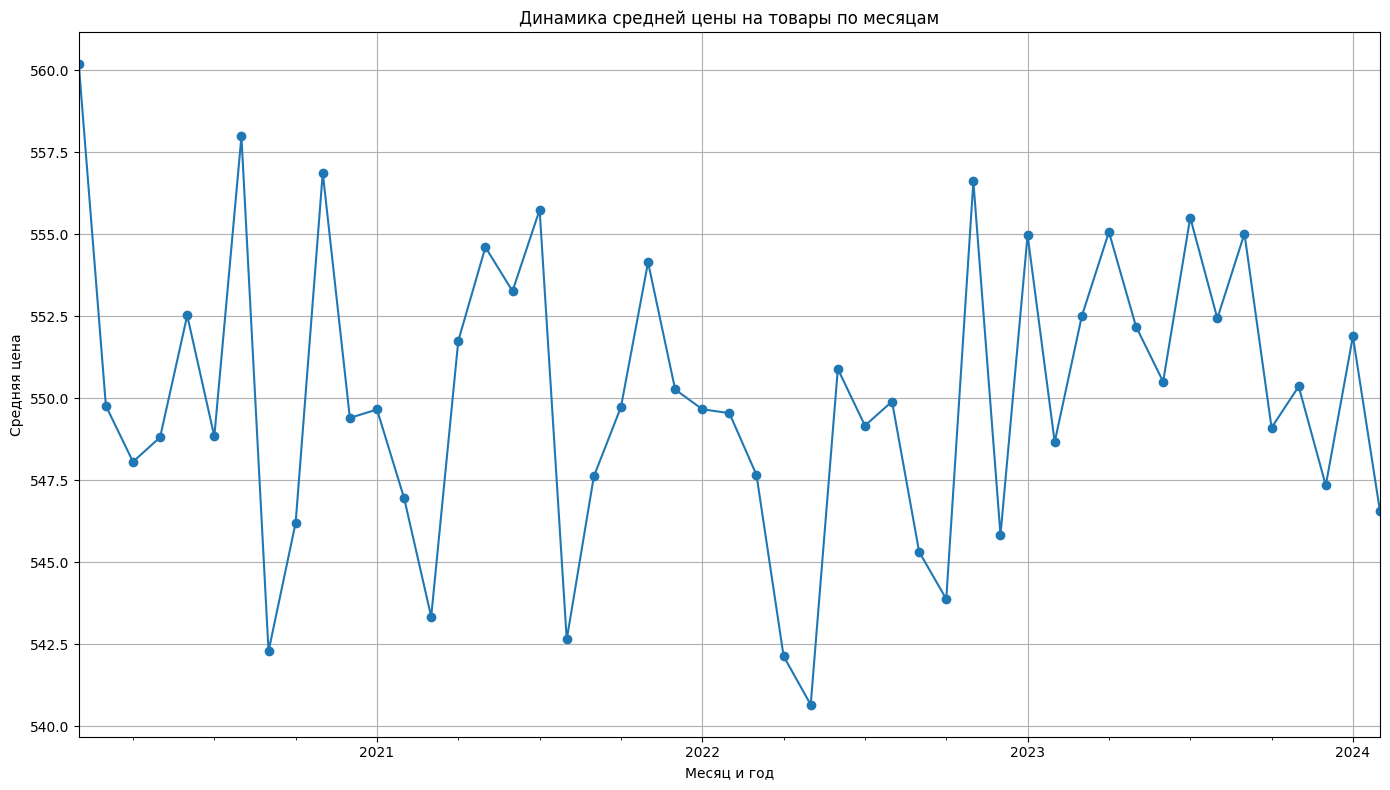

In [7]:
# Создаем копию DataFrame для безопасной работы
df_copy_2 = df.copy()

# Преобразовываем столбец 'sale_date' в формат даты
df_copy_2['sale_date'] = pd.to_datetime(df_copy_2['sale_date'])

# Создаем новый столбец 'sale_month', содержащий месяц продажи
df_copy_2['sale_month'] = df_copy_2['sale_date'].dt.to_period('M')

# Группируем данные по месяцам и вычисляем среднюю цену
monthly_avg_price = df_copy_2.groupby('sale_month')['price'].mean()

# Строим график
plt.figure(figsize=(14, 8))
monthly_avg_price.plot(marker='o')
plt.title('Динамика средней цены на товары по месяцам')
plt.xlabel('Месяц и год')
plt.ylabel('Средняя цена')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 6. Постройте график динамики средней цены каждого товара по месяцам.

In [8]:
# Создаем копию DataFrame для безопасной работы
df_copy_ = df.copy()

# Преобразовываем столбец 'sale_date' в формат даты
df_copy['sale_date'] = pd.to_datetime(df_copy['sale_date'])

# Создаем новый столбец 'sale_month', содержащий месяц продажи
df_copy['sale_month'] = df_copy['sale_date'].dt.to_period('M')

# Получаем список всех продуктов
all_products = df_copy['product'].unique()

def plot_product_avg_price(product):
    # Создаем копию DataFrame с данными только для выбранного продукта
    df_product = df_copy[df_copy['product'] == product]
    
    # Группируем данные по месяцам и вычисляем среднюю цену
    monthly_avg_price = df_product.groupby('sale_month')['price'].mean()
    
    # Строим график
    plt.figure(figsize=(14, 8))
    monthly_avg_price.plot(x='sale_month', marker='o')
    plt.title(f'Динамика средней цены на товар "{product}" по месяцам')
    plt.xlabel('Месяц и год')
    plt.ylabel('Средняя цена')
    plt.grid()
    plt.tight_layout()
    plt.show()

# Создаем виджет для выбора продукта из списка всех продуктов
product_dropdown = widgets.Dropdown(options=all_products, description='Product:')

# Используем функцию interact для связывания виджета с функцией построения графика
interact(plot_product_avg_price, product=product_dropdown);

interactive(children=(Dropdown(description='Product:', options=('Monitor', 'Laptop', 'Smartphone', 'Tablet', '…

#### 7. Постройте график динамики продаж каждого отдела по месяцам.

In [9]:
# Функция для построения графика
def plot_sales(department):
    # Создаем копию DataFrame для предотвращения изменений исходного DataFrame
    df_copy = df.copy()
    
    df_department = df_copy[df_copy['sale_place'] == department]
    # Используем .loc для изменения копии
    df_department.loc[:, 'sale_date'] = pd.to_datetime(df_department['sale_date'])
    df_department.set_index('sale_date', inplace=True)
    plt.figure(figsize=(14, 8))
    df_department.resample('M').size().plot(marker='o')
    plt.title(f'Сумма продаж {department} по месяцам')
    plt.xlabel('Месяц и год')
    plt.ylabel('Сумма продаж')
    plt.grid()
    plt.tight_layout()
    plt.show()

# Создание выпадающего списка для выбора отдела
department_widget = widgets.Dropdown(
    options=['point_1', 'point_2', 'point_3', 'point_4', 'online'],
    description='Sale place:',
)

# Вызов функции построения графика при изменении значения выпадающего списка
interact(plot_sales, department=department_widget)

interactive(children=(Dropdown(description='Sale place:', options=('point_1', 'point_2', 'point_3', 'point_4',…

<function __main__.plot_sales(department)>

#### 8. Постройте график динамики продаж каждого продавца по месяцам.

In [10]:
# Функция для построения графика
def plot_sales(salesperson):
    # Создаем копию DataFrame для предотвращения изменений исходного DataFrame
    df_copy = df.copy()
    
    df_salesperson = df_copy[df_copy['salesperson'] == salesperson]
    # Используем .loc для изменения копии
    df_salesperson.loc[:, 'sale_date'] = pd.to_datetime(df_salesperson['sale_date'])
    df_salesperson.set_index('sale_date', inplace=True)
    plt.figure(figsize=(14, 8))
    df_salesperson.resample('M').size().plot(marker='o')
    plt.title(f'Сумма продаж {salesperson} по месяцам')
    plt.xlabel('Месяц и год')
    plt.ylabel('Сумма продаж')
    plt.grid()
    plt.tight_layout()
    plt.show()

# Создание выпадающего списка для выбора отдела
salesperson_widget = widgets.Dropdown(
    options=df_copy['salesperson'].unique().tolist(),
    description='Salesperson:',
)

# Вызов функции построения графика при изменении значения выпадающего списка
interact(plot_sales, salesperson=salesperson_widget)

interactive(children=(Dropdown(description='Salesperson:', options=('Christopher_Cook', 'online', 'Matthew_Jac…

<function __main__.plot_sales(salesperson)>

#### 9. Постройте график прогнозирования продаж каждого отдела на три месяца.

In [11]:
# Функция для построения графика
def plot_sales(sale_place):
    # Создаем копию DataFrame для предотвращения изменений исходного DataFrame
    df_copy = df.copy()
    
    df_salesplace = df_copy[df_copy['sale_place'] == sale_place]
    # Используем .loc для изменения копии
    df_salesplace.loc[:, 'sale_date'] = pd.to_datetime(df_salesplace['sale_date'])
    df_salesplace.set_index('sale_date', inplace=True)
    
    # Определение начальной и конечной даты для обучения модели
    start_date = df_salesplace.index.min() + pd.offsets.MonthBegin(1)  # Первый день следующего месяца
    end_date = df_salesplace.index.max() - MonthEnd(1)  # Последний день предпоследнего месяца
    
    # Обрезка датафрейма
    df_salesplace = df_salesplace[start_date:end_date]
    
    # Преобразование данных для использования с Prophet
    df_prophet = df_salesplace.resample('M').size().reset_index()
    df_prophet.columns = ['ds', 'y']
    
    # Создание и обучение модели Prophet
    model = Prophet()
    model.fit(df_prophet)
    
    # Создание DataFrame для прогноза
    future = model.make_future_dataframe(periods=3, freq='M')
    forecast = model.predict(future)
    
    # Фильтрация прогноза, чтобы показать только следующий месяц
    next_month_forecast = forecast.loc[forecast['ds'] > df_prophet['ds'].max()]
    
    # Построение графика
    plt.figure(figsize=(14, 8))
    
    # Отображение фактических данных за весь период
    plt.plot(df_prophet['ds'],
             df_prophet['y'],
             marker='o',
             label='Исходные данные')
    
    # Отображение прогноза следующего месяца
    plt.plot(next_month_forecast['ds'],
             next_month_forecast['yhat'],
             linestyle='--',
             color='red',
             marker='o',
             label='Прогноз')
    
    # Добавление значений прогноза на график
    for x, y in zip(next_month_forecast['ds'], next_month_forecast['yhat']):
        plt.annotate(f'{y:.0f}',
                     xy=(x, y),
                     xytext=(5, 5),
                     textcoords='offset points',
                     fontsize=12)
    
    plt.title(f'Сумма продаж в {sale_place} по месяцам с прогнозом')
    plt.xlabel('Месяц и год')
    plt.ylabel('Сумма продаж')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Создание выпадающего списка для выбора места продаж
sale_place_widget = widgets.Dropdown(
    options=df_copy['sale_place'].unique().tolist(),
    description='Sale Place:',
)

# Вызов функции построения графика при изменении значения выпадающего списка
interact(plot_sales, sale_place=sale_place_widget)

interactive(children=(Dropdown(description='Sale Place:', options=('point_4', 'online', 'point_1', 'point_2', …

<function __main__.plot_sales(sale_place)>

#### 10. Постройте график прогнозирования продаж каждого продавца на три месяца.

In [12]:
# Функция для построения графика
def plot_sales(salesperson):
    # Создаем копию DataFrame для предотвращения изменений исходного DataFrame
    df_copy = df.copy()
    
    df_salesperson = df_copy[df_copy['salesperson'] == salesperson]
    # Используем .loc для изменения копии
    df_salesperson.loc[:, 'sale_date'] = pd.to_datetime(df_salesperson['sale_date'])
    df_salesperson.set_index('sale_date', inplace=True)
    
    # Определение начальной и конечной даты для обучения модели
    start_date = df_salesperson.index.min() + pd.offsets.MonthBegin(1)  # Первый день следующего месяца
    end_date = df_salesperson.index.max() - MonthEnd(1)  # Последний день предпоследнего месяца
    
    # Обрезка датафрейма
    df_salesperson = df_salesperson[start_date:end_date]
    
    # Преобразование данных для использования с Prophet
    df_prophet = df_salesperson.resample('M').size().reset_index()
    df_prophet.columns = ['ds', 'y']
    
    # Создание и обучение модели Prophet
    model = Prophet()
    model.fit(df_prophet)
    
    # Создание DataFrame для прогноза
    future = model.make_future_dataframe(periods=3, freq='M')
    forecast = model.predict(future)
    
    # Фильтрация прогноза, чтобы показать только следующий месяц
    next_month_forecast = forecast.loc[forecast['ds'] > df_prophet['ds'].max()]
    
    # Построение графика
    plt.figure(figsize=(14, 8))
    
    # Отображение фактических данных за весь период
    plt.plot(df_prophet['ds'],
             df_prophet['y'],
             marker='o',
             label='Исходные данные')
    
    # Отображение прогноза следующего месяца
    plt.plot(next_month_forecast['ds'],
             next_month_forecast['yhat'],
             linestyle='--',
             color='red',
             marker='o',
             label='Прогноз')
    
    # Добавление значений прогноза на график
    for x, y in zip(next_month_forecast['ds'], next_month_forecast['yhat']):
        plt.annotate(f'{y:.0f}',
                     xy=(x, y),
                     xytext=(5, 5),
                     textcoords='offset points',
                     fontsize=12)
    
    plt.title(f'Сумма продаж {salesperson} по месяцам с прогнозом')
    plt.xlabel('Месяц и год')
    plt.ylabel('Сумма продаж')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Создание выпадающего списка для выбора отдела
salesperson_widget = widgets.Dropdown(
    options=df_copy['salesperson'].unique().tolist(),
    description='Salesperson:',
)

# Вызов функции построения графика при изменении значения выпадающего списка
interact(plot_sales, salesperson=salesperson_widget)

interactive(children=(Dropdown(description='Salesperson:', options=('Christopher_Cook', 'online', 'Matthew_Jac…

<function __main__.plot_sales(salesperson)>